In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1) # set seed for reproducibility

# Example 1 - Coin Tossing Game

## 1.1. Consider only 1 simulation of 1,000 turns

In [2]:
# Create an array of 1001 uniform random variables from 0 to 1
p = np.random.uniform(0,1,1001)

# Convert the uniform rv into a set of outcomes from the coin toss (H is p >= 0.5, else T)
rv = np.ones(1001) * (p >= 0.5) + -1*np.ones(1001) * (p < 0.5)

# set instance 0 to be 0 (score is zero at 0th turn)
rv[0] = 0 

# cumulative score
sp = rv.cumsum()

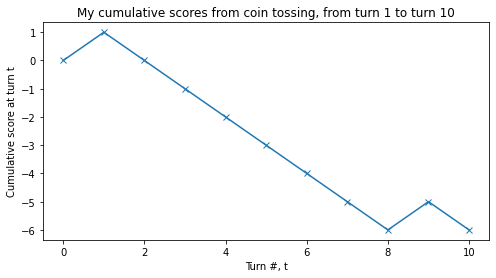

In [3]:
# Plot the cumulative score development after 10 rounds
plt.figure(figsize = (8,4))
plt.plot(sp[:11], marker = 'x')
plt.xlabel('Turn #, t')
plt.ylabel('Cumulative score at turn t')
plt.title('My cumulative scores from coin tossing, from turn 1 to turn 10')
plt.show()

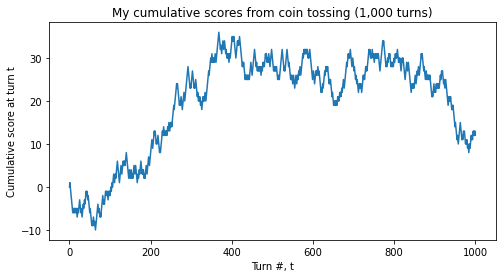

In [4]:
# Plot the cumulative score development after 1000 rounds
plt.figure(figsize = (8,4))
plt.plot(sp.T)
plt.xlabel('Turn #, t')
plt.ylabel('Cumulative score at turn t')
plt.title('My cumulative scores from coin tossing (1,000 turns)')
plt.show()

## 1.2. 50 simulations

In [5]:
p = np.random.uniform(0,1,(50,1001))
rv = np.ones((50,1001)) * (p >= 0.5) + -1*np.ones((50,1001)) * (p < 0.5) 
rv[:,0] = 0
sp = rv.cumsum(axis = 1)

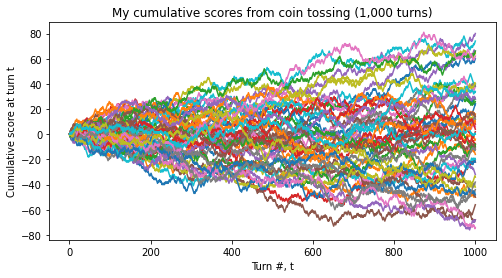

In [6]:
plt.figure(figsize = (8,4))
plt.plot(sp.T)
plt.xlabel('Turn #, t')
plt.ylabel('Cumulative score at turn t')
plt.title('My cumulative scores from coin tossing (1,000 turns)')
plt.show()

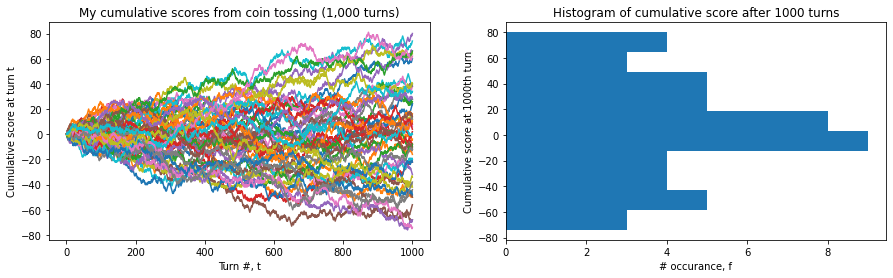

In [14]:
fig, axs = plt.subplots(1,2,figsize = (15,4))
axs[0].plot(sp.T)
axs[0].set_xlabel('Turn #, t')
axs[0].set_ylabel('Cumulative score at turn t')
axs[0].set_title('My cumulative scores from coin tossing (1,000 turns)')

axs[1].hist(sp[:,-1],orientation='horizontal')
axs[1].set_xlabel('# occurance, f')
axs[1].set_ylabel('Cumulative score at 1000th turn')
axs[1].set_title('Histogram of cumulative score after 1000 turns')

plt.show()

# Example 2. Call Options on AAPL

Assumptions:
- Current underlying price, $S_0 = 179$
- risk free rate, $r = 5.3\%$
- Time to maturity (years), $T = 0.5$
- Volatility, $\sigma = 20\%$


Equation to calculate underlying price $S_t$ at time $t$:

$$S_t \approx S_{t-1} + rS_{t-1}\Delta t + \sigma S_{t-1} \sqrt{\Delta t} \tilde{X}$$

for $\tilde{X} \sim N(0,1)$

In [15]:
# Basic parameters
S0= 179
r = 0.053
T = 0.5
sigma = 0.20

# Number of time step: 180
N = 360 * T
delta_t = T/360

# Generate standard distribution random variable
X = np.random.normal(size = (500,360))

# Calculate asset price at each time step using discrete method
S = np.zeros(shape = (500,361))
S[:,0] = S0
for i in range(1, 361):
    S[:, i] = S[:, i-1] + r * S[:, i-1] * delta_t + sigma * S[:, i-1] * np.sqrt(delta_t)*X[:, i-1]

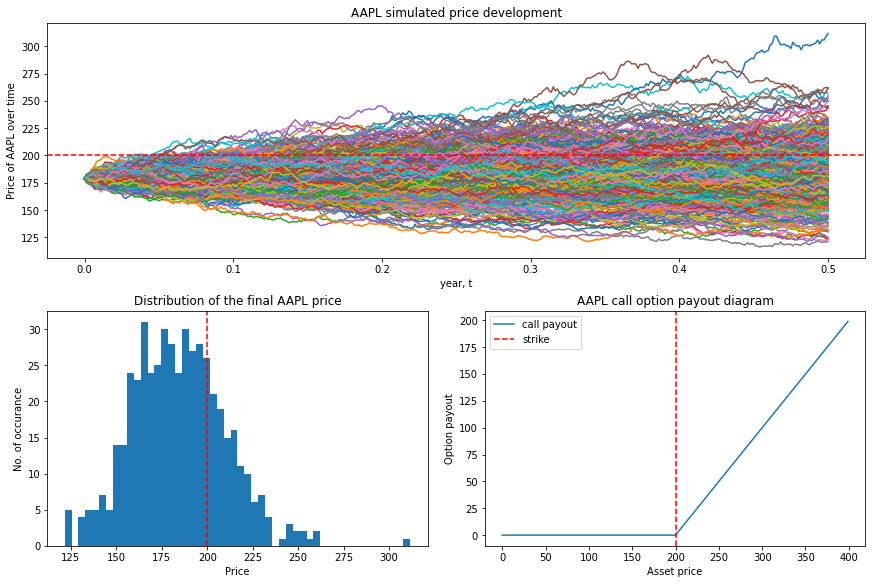

In [16]:
fig = plt.figure(constrained_layout=True, figsize = (12,8))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

t = np.arange(0, T+delta_t, delta_t)
ax1.plot(t,S.T)
ax1.axhline(200, c = 'r', ls = '--')
ax1.set_xlabel('year, t')
ax1.set_ylabel('Price of AAPL over time')
ax1.set_title('AAPL simulated price development')

ax2.hist(S[:,-1], bins = 50)
ax2.axvline(200, ls = '--', c = 'r')
ax2.set_ylabel('No. of occurance')
ax2.set_xlabel('Price')
ax2.set_title('Distribution of the final AAPL price')


S_T = np.arange(0, 400, 1)
K = 200
H = (S_T - K) * (S_T > K)
ax3.plot(S_T, H, label = 'call payout')
ax3.axvline(200, ls = '--', c = 'r', label = 'strike')
ax3.set_ylabel('Option payout')
ax3.set_xlabel('Asset price')
ax3.set_title('AAPL call option payout diagram')
ax3.legend()

plt.show()

---
© 2023 Finsinyur. All rights reserved.